In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"
contenido = requests.get(url).text

In [3]:
soup = BeautifulSoup(contenido, "html.parser")

In [4]:
parrafos = soup.find_all("p")

In [5]:
print(parrafos)

[<p><strong>Title</strong>: La Odisea</p>, <p><strong>Author</strong>: Homer</p>, <p><strong>Illustrator</strong>: John Flaxman</p>, <p style="margin-top:0"> <span style="padding-left: 7.5ex"></span>Walter Paget</p>, <p><strong>Translator</strong>: Luis Segalá y Estalella</p>, <p><strong>Release date</strong>: November 2, 2018 [eBook #58221]</p>, <p><strong>Language</strong>: Spanish</p>, <p><strong>Credits</strong>: Produced by Ramon Pajares Box, Carlos Colon, and the Online<br/>
        Distributed Proofreading Team at http://www.pgdp.net</p>, <p><a class="pginternal" href="#tnote">Nota de transcripción</a></p>, <p><a class="pginternal" href="#Index">Índice de nombres propios</a></p>, <p><a class="pginternal" href="#ToI">Índice de grabados</a></p>, <p><a class="pginternal" href="#ToC">Índice general</a></p>, <p><a class="pginternal" href="#notas">Notas al prólogo</a></p>, <p><span class="pagenum" id="Page_1">[p. 1]</span></p>, <p><span class="pagenum" id="Page_2">[p. 2]</span></p>, <

In [6]:
h1 = soup.find_all("h1")

In [7]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [8]:
italicas = soup.find_all("i")

In [9]:
from collections import Counter

In [10]:
parrafos = str(soup.find_all("p"))

In [11]:
print(parrafos.count("Ulises"))

1662


In [12]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Ciclope")
buscar_palabra("Minerva")
buscar_palabra("Alcínoo")
buscar_palabra("CANTO")

Encontraste la palabra 'Ciclope' 82 veces
Encontraste la palabra 'Minerva' 376 veces
Encontraste la palabra 'Alcínoo' 130 veces
Encontraste la palabra 'CANTO' 114 veces


## Algo divertido

In [13]:
import random

In [14]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [15]:
print("\nLee un pasaje aleatorio de la Odisea")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Odisea
-------------------------------------------
242 Respondióle Leócrito
Evenórida: «¡Méntor perverso é insensato! ¡Qué dijiste! ¡Incitarles
á que nos hagan desistir! Dificultoso les sería y hasta á un
número mayor de hombres, luchar con nosotros para privarnos de los
banquetes. Pues si el mismo Ulises de Ítaca, viniendo en persona,
encontrase á los ilustres pretendientes comiendo en el palacio y
resolviera en su corazón echarlos de su casa, no se alegraría su
esposa de que hubiese vuelto, aunque mucho lo desea, porque allí
mismo recibiría el héroe indigna muerte si osaba combatir con tantos
varones. En verdad que no has hablado como debías. Mas, ea, separaos
y volved á vuestras ocupaciones. Méntor y Haliterses, que siempre han
sido amigos de Telémaco por su padre, le animarán para que emprenda
el viaje; pero se me figura que, permaneciendo quieto durante mucho
tiempo, oirá en Ítaca las noticias que vengan y jamás realizará su
propósito.»
-------------

## Visualizaciones interesantes


In [16]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

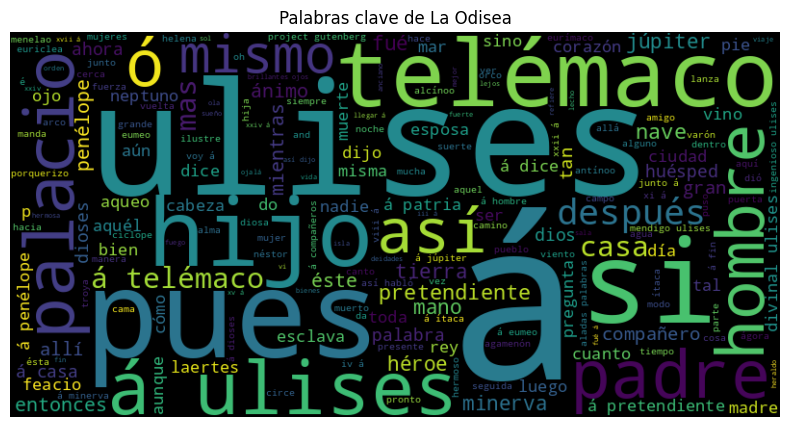

In [20]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [21]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

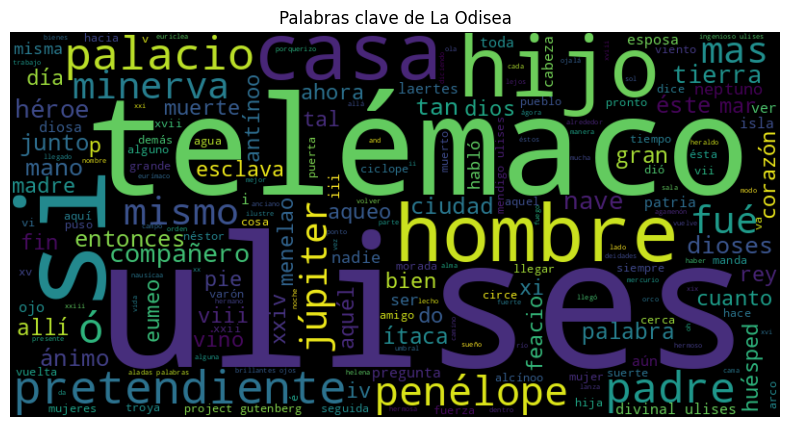

In [22]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()